In [8]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [9]:
data = {'x' : [13,19,16,14,15,14],
       'y' : [40,83,62,48,58,43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


<AxesSubplot:xlabel='x', ylabel='y'>

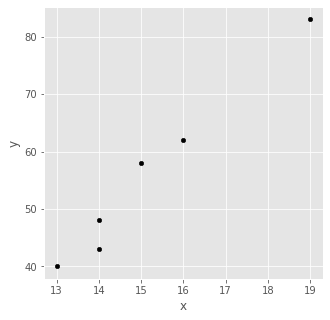

In [10]:
data.plot(kind="scatter", x='x', y='y',figsize=(5,5), color="black")

In [12]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))
print('a value =', linear_regression.intercept_)
print('b value =', linear_regression.coef_)

a value = -55.48175182481753
b value = [7.32846715]


In [13]:
residuals = data["y"] - prediction
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [15]:
SSE = (residuals**2).sum()
SST = ((data["y"] - data["y"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared =', R_squared)

R_squared = 0.9753156179610034


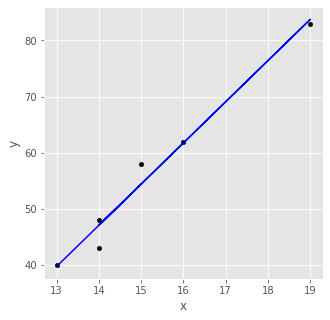

In [16]:
data.plot(kind="scatter", x="x", y="y", figsize=(5,5), color="black")

#plot regression line
plt.plot(data["x"], prediction, color="blue")

In [17]:
from sklearn.metrics import mean_squared_error
print('score=', linear_regression.score(X=pd.DataFrame(data["x"]), y=data["y"]))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('RMSE = ', mean_squared_error(prediction, data['y'])**5)

score= 0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  3703.456019624502


In [19]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [23]:
data_frame.columns = boston_house_prices.feature_names
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [24]:
data_frame['Price'] = boston_house_prices.target
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


<AxesSubplot:xlabel='RM', ylabel='Price'>

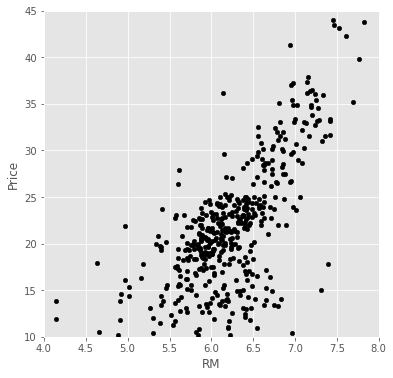

In [27]:
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6), color="black", xlim=(4,8), ylim=(10,45))

In [29]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame["RM"]))
print('a value =', linear_regression.intercept_)
print('b value =', linear_regression.coef_)

a value = -34.67062077643857
b value = [9.10210898]


In [30]:
residuals = data_frame["Price"] - prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [34]:
SSE = (residuals**2).sum()
SST = ((data_frame["Price"]-data_frame["Price"].mean())**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.4835254559913341


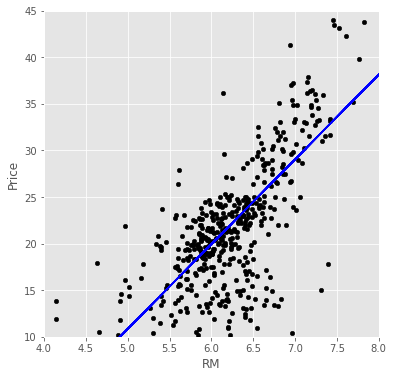

In [35]:
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6), color="black", xlim=(4,8), ylim=(10,45))

#Plot regression line
plt.plot(data_frame["RM"], prediction, color="blue")

In [37]:
print('score = ', linear_regression.score(X = pd.DataFrame(data_frame["RM"]), y=data_frame["Price"]))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data_frame["Price"]))
print('RMSE = ', mean_squared_error(prediction, data_frame["Price"])**0.5)

score =  0.48352545599133423
Mean_Squared_Error =  43.60055177116956
RMSE =  6.603071389222561


In [38]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [49]:
data = {'x1' : [13,18,17,20,22,21], 'x2' : [9,7,17,11,8,10], 'y' : [20,22,30,27,35,32]}
data = pd.DataFrame(data)
X = data[['x1', 'x2']]
y = data['y']
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [50]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X=pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -7.35920177383591
b value =  [1.5443459  0.62472284]


In [52]:
residuals = y-prediction
residuals.describe()

count    6.000000e+00
mean    -4.736952e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [53]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())*2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared)

R_squared =  2419569197669799.0


In [54]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7969440176685233
Mean_Squared_Error =  5.730691056910563
RMSE =  2.393886182948254


In [55]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [56]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [57]:
X = pd.DataFrame(boston_house_prices.data)
X.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [58]:
X.columns = boston_house_prices.feature_names
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [61]:
X['Price'] = boston_house_prices.target
y = X.pop('Price')
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [63]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X), y=y)
prediction = linear_regression.predict(X=pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  36.459488385089855
b value =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [64]:
residuals = y-prediction
residuals.describe()

count    5.060000e+02
mean     2.924319e-15
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
Name: Price, dtype: float64

In [65]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1-(SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7406426641094094


In [66]:
print('score = ', linear_regression.score(X = pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7406426641094095
Mean_Squared_Error =  21.894831181729202
RMSE =  4.679191295697281


In [67]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas as pd
diabetes_data = datasets.load_diabetes()
X = pd.DataFrame(diabetes_data.data)
y = diabetes_data.target
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)
residuals = y-prediction
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)
print('score = ', linear_regression.score(X = pd.DataFrame(X), y = y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

a value =  152.1334841628965
b balue = [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
R_squared =  0.5177494254132934
score =  0.5177494254132934
Mean_Squared_Error =  2859.6903987680657
RMSE =  53.47607314274362
